## Observations and Insights 

In [1]:
# Instructions: Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn import datasets
from scipy.stats import linregress

# Instructions: Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Instructions: Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Instructions: Combine the data into a single dataset
mouse_study_data = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
# Instructions:  Display the data table for preview
mouse_study_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Instructions: Checking the number of mice.

mouse_study_data["Mouse ID"].nunique()

249

In [3]:
# Instructions: Getting the duplicate that shows up for Mouse ID and Timepoint. 

# Get a count to ID how many duplicate values
mouse_study_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False).sum()

10

In [4]:
# Instructions: Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Instructions: Optional: Get all the data for the duplicate mouse ID. 

# Use duplicate function to the ID for the duplicates
mouse_study_data.loc[mouse_study_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False), :]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Instructions: Create a clean DataFrame by dropping the duplicate mouse by its ID.

# Drop function to remove mouse with duplicates
mouse_study_data.drop(mouse_study_data.loc[mouse_study_data["Mouse ID"]=="g989"].index, inplace=True)


In [6]:
# Instructions: Checking the number of mice in the clean DataFrame.

mouse_study_data["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Instructions: Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Instructions: Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Instructions: Assemble the resulting series into a single summary dataframe.

# Use groupby for drug regimen
drug_data_gb = mouse_study_data.groupby(["Drug Regimen"])

# The mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_vol_mean = drug_data_gb["Tumor Volume (mm3)"].mean()
tumor_vol_median = drug_data_gb["Tumor Volume (mm3)"].median()
tumor_vol_var = drug_data_gb["Tumor Volume (mm3)"].var()
tumor_vol_std = drug_data_gb["Tumor Volume (mm3)"].std()
tumor_vol_sem = drug_data_gb["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
tumor_vol_sum_stats = pd.DataFrame({
    
    "Mean": round(tumor_vol_mean,2),
    "Median": round(tumor_vol_median,2),
    "Variance": round(tumor_vol_var,2),
    "Std Dev": round(tumor_vol_std,2),
    "SEM": round(tumor_vol_sem,2)
})

# Display the information
tumor_vol_sum_stats.index.name = "Drug Regimen (Tumor Vol)"
tumor_vol_sum_stats

,Mean,Median,Variance,Std Dev,SEM
Drug Regimen (Tumor Vol),,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [8]:
# Instructions:  Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Instructions: Using the aggregation method, produce the same summary statistics in a single line

# Use the agg method and display the information
drug_data_gb["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"]).round(2)

,mean,median,var,std,sem
Drug Regimen (Tumor Vol),,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

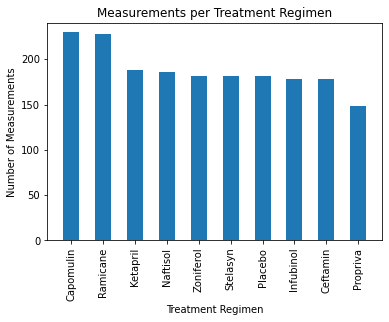

In [9]:
# Instructions: Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

# Get the values of each drug regimen
drug_reg = mouse_study_data['Drug Regimen'].value_counts()
# Plot the graph
drug_reg.plot(kind = "bar")

# Set the formatting of the graph
plt.title("Measurements per Treatment Regimen")
plt.xlabel("Treatment Regimen")
plt.ylabel("Number of Measurements")

# Set the limits
plt.xlim(-0.75, len(drug_reg.index)-.25)
plt.ylim(0, max(drug_reg.values) +10)

# Display the information
plt.show()


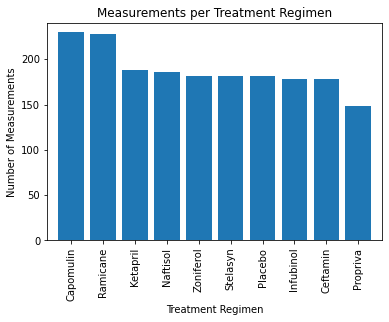

In [10]:
# Instructions: Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

# Plot the graph
plt.bar(drug_reg.index, drug_reg.values)
plt.xticks(drug_reg.index, drug_reg.index, rotation="vertical")

# Set the formatting of the graph
plt.title("Measurements per Treatment Regimen")
plt.xlabel("Treatment Regimen")
plt.ylabel("Number of Measurements")

# Set the limits
plt.xlim(-0.75, len(drug_reg.index)-.25)
plt.ylim(0, max(drug_reg.values) + 10)

# Display the information
plt.show()

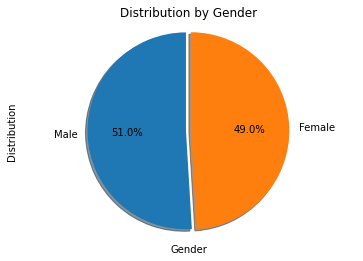

In [11]:
# Instructions: Generate a pie plot showing the distribution of female versus male mice using pandas

# Get the values of each gender
gender_data = mouse_study_data["Sex"].value_counts() 
# Plot the graph
gender_data.plot(kind = "pie", explode=(0, 0.05), labels=gender_data.index, autopct='%1.1f%%', shadow=True, startangle=90)

# Set the formatting of the graph
plt.title("Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Distribution")
plt.axis("equal")

# Display the information
plt.show()


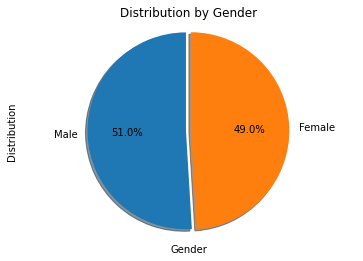

In [12]:
# Instructions: Generate a pie plot showing the distribution of female versus male mice using pyplot

# Plot the graph
plt.pie(gender_data.values,explode=(0, 0.05), labels=gender_data.index, autopct="%1.1f%%", shadow=True, startangle=90)

# Set the formatting of the graph
plt.title("Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Distribution")
plt.axis("equal")

# Display the information
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Instructions: Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tp = mouse_study_data.groupby("Mouse ID")["Timepoint"].max()
max_tp = max_tp.reset_index().rename(columns={"Timepoint": "Max Timepoint"})
max_tp

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_vol_data = pd.merge(mouse_study_data, max_tp, on="Mouse ID")
tumor_vol_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [14]:
# Put treatments into a list for loop (and later for plot labels)
treatments=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_ls=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for x in treatments:
    
    # Locate the rows which contain mice on each drug
    # add subset based on the max timepoint created previously
    final_tv_data = tumor_vol_data.loc[(tumor_vol_data["Drug Regimen"] == x) & (tumor_vol_data["Timepoint"] == tumor_vol_data["Max Timepoint"])]
    
    #  and get the tumor volumes
    tumor_vol =final_tv_data["Tumor Volume (mm3)"]
    tumor_vol_ls.append(tumor_vol)

    # Calculate the IQR.
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    # Print the IQR and where potential outliers stand
    print(f"The interquartile range of the final tumor volumes for {x} is: {round(iqr,5)}")
    print(f"Values below {round(lower_bound,5)} could be outliers.")
    print(f"Values above {round(upper_bound,5)} could be outliers.")
    
    # Count the outliers of the above and below the upper bounds
    outliers = (final_tv_data["Tumor Volume (mm3)"].loc[(final_tv_data['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (final_tv_data['Tumor Volume (mm3)'] <= lower_bound)]).count()

    # Print count of potential outliers
    print(f"There are {outliers} potential outliers in {x} treatment based on the bounds")
    print("")

The interquartile range of the final tumor volumes for Capomulin is: 7.78186
Values below 20.70456 could be outliers.
Values above 51.83202 could be outliers.
There are 0 potential outliers in Capomulin treatment based on the bounds

The interquartile range of the final tumor volumes for Ramicane is: 9.09854
Values below 17.91266 could be outliers.
Values above 54.30681 could be outliers.
There are 0 potential outliers in Ramicane treatment based on the bounds

The interquartile range of the final tumor volumes for Infubinol is: 11.47714
Values below 36.8329 could be outliers.
Values above 82.74145 could be outliers.
There are 1 potential outliers in Infubinol treatment based on the bounds

The interquartile range of the final tumor volumes for Ceftamin is: 15.57775
Values below 25.35545 could be outliers.
Values above 87.66646 could be outliers.
There are 0 potential outliers in Ceftamin treatment based on the bounds



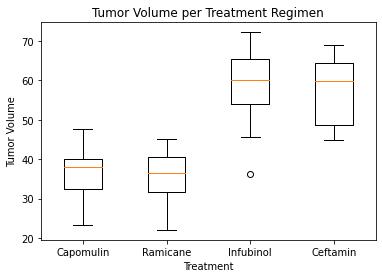

In [15]:
# Instructions: Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Plot the graph
fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_vol_ls)
plt.xticks([1, 2, 3, 4], treatments)

# Set the formatting of the graph
ax1.set_title("Tumor Volume per Treatment Regimen")
ax1.set_xlabel("Treatment")
ax1.set_ylabel("Tumor Volume")

# Display the information
plt.show()

## Line and Scatter Plots

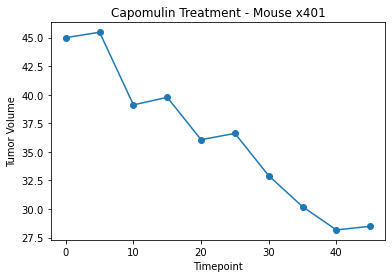

In [16]:
# Instructions: Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Identify mouse treated with Capomulin
cap_mouse_lookup = mouse_study_data.loc[mouse_study_data["Drug Regimen"] == "Capomulin"]["Mouse ID"].unique()
# Use chosen mouse from array to plot
cap_mouse = mouse_study_data.loc[mouse_study_data["Mouse ID"] == "x401"]

# Plot the graph
plt.plot(cap_mouse["Timepoint"], cap_mouse["Tumor Volume (mm3)"],  marker ='o')

# Set the formatting of the graph
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.title("Capomulin Treatment - Mouse x401")

# Display the information
plt.show()

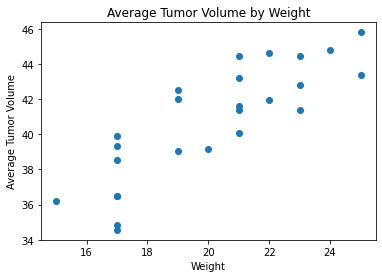

In [17]:
# Instructions: Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Identify Capomulin data
capo_data = mouse_study_data.loc[mouse_study_data["Drug Regimen"] == "Capomulin"]

# Getting the average (mean) tumor volume and weight for each mouse
# (Average of same weight will give original weight #)
avg_cap_tv = capo_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
avg_cap_w = capo_data.groupby("Mouse ID")["Weight (g)"].mean()

# Plot the graph
plt.scatter(avg_cap_w,avg_cap_tv)

# Set the formatting of the graph
plt.xlabel("Weight")
plt.ylabel("Average Tumor Volume")
plt.title("Average Tumor Volume by Weight")

# Display the information
plt.show()


## Correlation and Regression

The correlation between both factors is 0.84


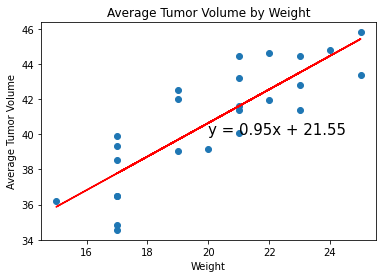

In [18]:
# Instructions: Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#correlation mouse weight and average tumor volume
correlation = st.pearsonr(avg_cap_w,avg_cap_tv)
print(f"The correlation between both factors is {round(correlation[0],2)}")

#linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_cap_w, avg_cap_tv)
regress_values = avg_cap_w * slope + intercept

# Plot the graph with slope intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(avg_cap_w,avg_cap_tv)
plt.plot(avg_cap_w,regress_values,"r-")

# Set the formatting of the graph
plt.annotate(line_eq,(20,40),fontsize=15,color="black")
plt.title("Average Tumor Volume by Weight")
plt.xlabel("Weight")
plt.ylabel("Average Tumor Volume")

# Display the information
plt.show()

